# Kerasの基礎
RNNのコードを学ぶ前に、Kerasの基礎をおさえておきましょう。

## 学習用のデータを用意
今回は、Kerasに慣れるためにシンプルな学習用のデータを用意します。  
正解を、サイン関数の値とします。

[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


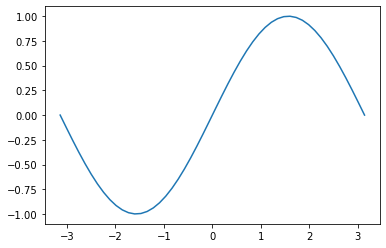

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reshapeは配列の形状を変更できる。引数に-1を指定すると、自動で行や列の数が決まる。
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)  # -πからπまで 
t = np.sin(x)  # sin関数

print(x)

plt.plot(x, t)
plt.show()

## ニューラルネットワークの構築
Kerasを使ってニューラルネットワークを構築します。  
Sequential()によりモデルを作成し、addメソッドにより層を追加します。  
Dense()により、通常の層を作ることができます。  

In [2]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


## 学習
構築したモデルを使って、学習を行います。  
学習にはモデルオブジェクトのfit()メソッドを使います。

In [3]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)  # 10%のデータを検証用に使う

Epoch 1/2000
6/6 [==============================] - 0s 59ms/step - loss: 0.5021 - val_loss: 0.1384
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.3281 - val_loss: 0.1066
Epoch 3/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.2886 - val_loss: 0.1002
Epoch 4/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.2768 - val_loss: 0.1186
Epoch 5/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.2290 - val_loss: 0.1320
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.2483 - val_loss: 0.1643
Epoch 7/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.2521 - val_loss: 0.1841
Epoch 8/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.2075 - val_loss: 0.2169
Epoch 9/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.2035 - val_loss: 0.2381
Epoch 10/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1853 - val_loss: 0.2794
Epoch 11/2000
6/6 

Epoch 84/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 0.7430
Epoch 85/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.1340 - val_loss: 0.7510
Epoch 86/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1361 - val_loss: 0.7473
Epoch 87/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1282 - val_loss: 0.7737
Epoch 88/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1712 - val_loss: 0.7874
Epoch 89/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 0.7805
Epoch 90/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1462 - val_loss: 0.7574
Epoch 91/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1398 - val_loss: 0.7707
Epoch 92/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1419 - val_loss: 0.7775
Epoch 93/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1315 - val_loss: 0.7595
Epoch 94/2

6/6 [==============================] - 0s 5ms/step - loss: 0.1297 - val_loss: 0.7164
Epoch 167/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1244 - val_loss: 0.7328
Epoch 168/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1339 - val_loss: 0.7305
Epoch 169/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.7034
Epoch 170/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1154 - val_loss: 0.7148
Epoch 171/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1388 - val_loss: 0.7297
Epoch 172/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1082 - val_loss: 0.7513
Epoch 173/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1129 - val_loss: 0.7278
Epoch 174/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1108 - val_loss: 0.7131
Epoch 175/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1266 - val_loss: 0.7242
Epoch 176/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 0.7138
Epoch 249/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1258 - val_loss: 0.6929
Epoch 250/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1273 - val_loss: 0.7086
Epoch 251/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 0.7026
Epoch 252/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1158 - val_loss: 0.7332
Epoch 253/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0971 - val_loss: 0.7113
Epoch 254/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1233 - val_loss: 0.7216
Epoch 255/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0994 - val_loss: 0.7319
Epoch 256/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.1136 - val_loss: 0.7206
Epoch 257/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1266 - val_loss: 0.7002
Epoch 258/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 0.6649
Epoch 331/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1052 - val_loss: 0.6781
Epoch 332/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0959 - val_loss: 0.6661
Epoch 333/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0844 - val_loss: 0.6551
Epoch 334/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1147 - val_loss: 0.6657
Epoch 335/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0765 - val_loss: 0.6673
Epoch 336/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0719 - val_loss: 0.6845
Epoch 337/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0825 - val_loss: 0.6543
Epoch 338/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1056 - val_loss: 0.6463
Epoch 339/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0791 - val_loss: 0.6636
Epoch 340/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 0.6156
Epoch 413/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0694 - val_loss: 0.6097
Epoch 414/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 0.6062
Epoch 415/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 0.5925
Epoch 416/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0627 - val_loss: 0.6064
Epoch 417/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0860 - val_loss: 0.6037
Epoch 418/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0644 - val_loss: 0.6231
Epoch 419/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1049 - val_loss: 0.5956
Epoch 420/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 0.6130
Epoch 421/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0765 - val_loss: 0.6259
Epoch 422/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0829 - val_loss: 0.5602
Epoch 495/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0632 - val_loss: 0.5493
Epoch 496/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0690 - val_loss: 0.5608
Epoch 497/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0634 - val_loss: 0.5535
Epoch 498/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0661 - val_loss: 0.5695
Epoch 499/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0731 - val_loss: 0.5746
Epoch 500/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0779 - val_loss: 0.5817
Epoch 501/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0839 - val_loss: 0.5704
Epoch 502/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0591 - val_loss: 0.5540
Epoch 503/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0685 - val_loss: 0.5556
Epoch 504/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.5079
Epoch 577/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.4992
Epoch 578/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0613 - val_loss: 0.4948
Epoch 579/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0601 - val_loss: 0.4795
Epoch 580/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.4949
Epoch 581/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0558 - val_loss: 0.4981
Epoch 582/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0639 - val_loss: 0.4928
Epoch 583/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.4942
Epoch 584/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0640 - val_loss: 0.4800
Epoch 585/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0549 - val_loss: 0.4938
Epoch 586/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.4435
Epoch 659/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.4447
Epoch 660/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.4378
Epoch 661/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.4361
Epoch 662/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.4368
Epoch 663/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0511 - val_loss: 0.4361
Epoch 664/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.4345
Epoch 665/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.4322
Epoch 666/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.4280
Epoch 667/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0568 - val_loss: 0.4357
Epoch 668/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.3810
Epoch 741/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.3728
Epoch 742/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.3755
Epoch 743/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.3631
Epoch 744/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.3736
Epoch 745/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.3812
Epoch 746/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.3788
Epoch 747/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.3907
Epoch 748/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.3865
Epoch 749/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.3810
Epoch 750/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.3383
Epoch 823/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.3302
Epoch 824/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.3278
Epoch 825/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.3164
Epoch 826/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0297 - val_loss: 0.3233
Epoch 827/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.3322
Epoch 828/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0319 - val_loss: 0.3340
Epoch 829/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.3332
Epoch 830/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.3340
Epoch 831/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.3285
Epoch 832/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.2847
Epoch 905/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.2929
Epoch 906/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.2956
Epoch 907/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2871
Epoch 908/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0194 - val_loss: 0.2830
Epoch 909/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.2833
Epoch 910/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.2790
Epoch 911/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.2877
Epoch 912/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.2826
Epoch 913/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.2803
Epoch 914/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.2546
Epoch 987/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.2567
Epoch 988/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.2544
Epoch 989/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2518
Epoch 990/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.2492
Epoch 991/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.2499
Epoch 992/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.2517
Epoch 993/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.2461
Epoch 994/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.2491
Epoch 995/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.2483
Epoch 996/2000


6/6 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.2256
Epoch 1068/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.2269
Epoch 1069/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.2287
Epoch 1070/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.2297
Epoch 1071/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.2271
Epoch 1072/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.2266
Epoch 1073/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.2219
Epoch 1074/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.2205
Epoch 1075/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0205 - val_loss: 0.2153
Epoch 1076/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2189
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.2014
Epoch 1149/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.2032
Epoch 1150/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.2006
Epoch 1151/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.2001
Epoch 1152/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.1973
Epoch 1153/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.1948
Epoch 1154/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.1968
Epoch 1155/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.1961
Epoch 1156/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.1916
Epoch 1157/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.1858
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1767
Epoch 1230/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.1748
Epoch 1231/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.1753
Epoch 1232/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.1753
Epoch 1233/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.1721
Epoch 1234/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.1754
Epoch 1235/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1758
Epoch 1236/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1760
Epoch 1237/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.1710
Epoch 1238/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.1723
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.1586
Epoch 1311/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.1615
Epoch 1312/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.1614
Epoch 1313/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.1631
Epoch 1314/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.1607
Epoch 1315/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.1619
Epoch 1316/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.1623
Epoch 1317/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.1606
Epoch 1318/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.1561
Epoch 1319/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.1565
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1453
Epoch 1392/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.1447
Epoch 1393/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1484
Epoch 1394/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.1474
Epoch 1395/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.1459
Epoch 1396/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1450
Epoch 1397/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.1479
Epoch 1398/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.1438
Epoch 1399/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.1437
Epoch 1400/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.1455
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.1390
Epoch 1473/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.1369
Epoch 1474/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.1334
Epoch 1475/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1328
Epoch 1476/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.1357
Epoch 1477/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.1357
Epoch 1478/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.1358
Epoch 1479/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1328
Epoch 1480/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.1350
Epoch 1481/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.1330
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.1277
Epoch 1554/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.1273
Epoch 1555/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.1237
Epoch 1556/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.1271
Epoch 1557/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1280
Epoch 1558/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.1242
Epoch 1559/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.1256
Epoch 1560/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.1228
Epoch 1561/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.1246
Epoch 1562/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.1280
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.1240
Epoch 1635/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.1221
Epoch 1636/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.1206
Epoch 1637/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1208
Epoch 1638/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.1175
Epoch 1639/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.1180
Epoch 1640/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.1194
Epoch 1641/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.1196
Epoch 1642/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.1164
Epoch 1643/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.1152
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.1132
Epoch 1716/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.1124
Epoch 1717/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.1136
Epoch 1718/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.1149
Epoch 1719/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.1142
Epoch 1720/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1137
Epoch 1721/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.1121
Epoch 1722/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.1104
Epoch 1723/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.1135
Epoch 1724/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1147
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.1067
Epoch 1797/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.1098
Epoch 1798/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.1063
Epoch 1799/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.1082
Epoch 1800/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.1092
Epoch 1801/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.1106
Epoch 1802/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.1099
Epoch 1803/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.1111
Epoch 1804/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.1085
Epoch 1805/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.1081
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.1062
Epoch 1878/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.1040
Epoch 1879/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.1042
Epoch 1880/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.1063
Epoch 1881/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.1070
Epoch 1882/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.1072
Epoch 1883/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.1054
Epoch 1884/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.1070
Epoch 1885/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1053
Epoch 1886/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.1046
Epoch 

6/6 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.1004
Epoch 1959/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.1014
Epoch 1960/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.1022
Epoch 1961/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.1046
Epoch 1962/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.1037
Epoch 1963/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.1039
Epoch 1964/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.1036
Epoch 1965/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.1020
Epoch 1966/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.1021
Epoch 1967/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.1045
Epoch 

## 学習の推移
fit()メソッドが返すオブジェクトを使って、学習の記録を後から確認することができます。

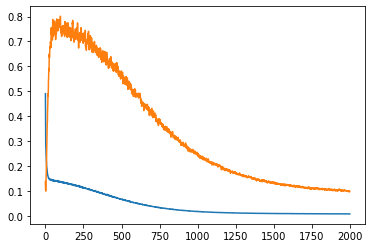

In [4]:
loss = history.history['loss']  # 訓練用データの誤差
vloss = history.history['val_loss']  # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

## 学習済みモデルの使用
predict()メソッドにより、学習済みモデルを使用し予測を行うことができます。

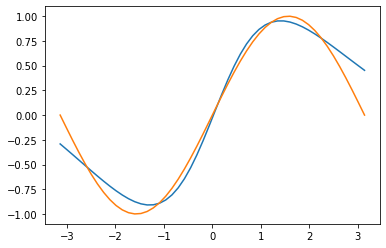

In [5]:
plt.plot(x, model.predict(x))  # モデルを使用し予測を行う
plt.plot(x, t)
plt.show()

モデルがサイン関数を学習していることが確認できました。  

Kerasについて、さらに詳しく知りたい方はこちらの公式ドキュメントを参考にしてください。  
https://keras.io/ja/  

## 課題
Kerasでニューラルネットワークを構築し、モデルにコサイン関数を学習させてみましょう。